In [36]:
import pandas as pd
import numpy as np
import collections

def createNeighbor(df):
    data = []
    for each_line in df.iterrows():
        for header in ["Proto","SrcAddr","Dport"]:
            if header == "SrcAddr":
                data.append([each_line[1][header],each_line[1]["DstAddr"]])
                data.append([each_line[1][header],each_line[1]["Proto"]])
                data.append([each_line[1][header],str(each_line[1]["Dport"])])
            else:
                data.append([str(each_line[1][header]),each_line[1]["DstAddr"]])

    return data

df = pd.read_csv("corpus_example.csv")

word2int={}
sentences = []
wordlist = []
for each_line in df.iterrows():
    sentences.append(each_line[1].tolist())
    for header in ["Proto","SrcAddr","DstAddr","Dport"]:
        wordlist.append(str(each_line[1][header]))

myCounter = collections.Counter(wordlist)
print(myCounter.most_common())
wordlist=set(wordlist)

neighbor = createNeighbor(df)
hi = pd.DataFrame(neighbor, columns = ['input', 'label'])

for i,word in enumerate(wordlist):
    word2int[word] = i

for each in word2int.keys():
    print(each+":"+str(word2int[each]))



[('tcp', 270), ('udp', 220), ('147.32.84.229', 186), ('13363', 88), ('147.32.80.9', 73), ('53', 73), ('80', 70), ('147.32.84.59', 59), ('443', 43), ('147.32.84.118', 41), ('147.32.85.25', 39), ('6881', 39), ('140.115.25.74', 30), ('147.32.84.138', 29), ('147.32.86.165', 25), ('147.32.84.111', 17), ('173.242.220.227', 17), ('188.121.222.1', 12), ('147.32.84.2', 11), ('10010', 10), ('147.32.3.51', 10), ('43087', 8), ('12114', 7), ('122.174.15.39', 7), ('147.32.86.24', 6), ('77.78.99.22', 6), ('147.32.87.22', 6), ('91.207.59.162', 6), ('203.23.120.136', 5), ('147.32.85.56', 4), ('147.32.86.166', 4), ('147.32.86.223', 4), ('74.125.232.213', 4), ('74.125.232.220', 4), ('147.32.84.46', 4), ('212.201.86.130', 3), ('147.32.85.18', 3), ('213.155.227.215', 3), ('92.40.253.219', 3), ('94.44.60.103', 3), ('123', 3), ('74.125.232.215', 3), ('161', 3), ('147.32.80.13', 3), ('8080', 3), ('188.112.125.201', 3), ('88.212.37.169', 3), ('147.32.86.110', 3), ('88.86.102.50', 2), ('94.100.187.194', 2), ('1

49653:471
109.153.100.95:472
12114:372
218.43.165.32:474
24.4.101.240:475
89.135.152.106:476
147.32.86.181:477
126.170.234.66:478
212.239.26.199:479
63550:480
115.173.243.205:481
2641:482
85.237.224.48:445
147.32.84.46:484
116.50.166.74:485
63231:191
8000:449
51019:488
41.130.235.95:489
56949:490
147.32.85.25:417
82.135.148.158:492
147.32.85.103:493


In [37]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(wordlist)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(hi['input'], hi['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

print(len(X_train))
print(len(Y_train))

2450
2450


In [38]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 
iteration = 1000

In [39]:
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 100 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

('iteration 0 loss is : ', 7.776575)
('iteration 100 loss is : ', 6.688847)
('iteration 200 loss is : ', 6.4710307)
('iteration 300 loss is : ', 6.202846)
('iteration 400 loss is : ', 5.881719)
('iteration 500 loss is : ', 5.597592)
('iteration 600 loss is : ', 5.3411694)
('iteration 700 loss is : ', 5.1431785)
('iteration 800 loss is : ', 5.00985)
('iteration 900 loss is : ', 4.9084244)


In [40]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-1.49625838e-01  3.56351018e-01]
 [ 6.14699602e-01  1.14861572e+00]
 [ 1.84624076e-01 -1.04172170e-01]
 [-3.46757114e-01  8.05311084e-01]
 [ 1.91207695e+00  1.69771349e+00]
 [ 1.94579077e+00  2.33579159e+00]
 [ 1.14367914e+00  6.29791975e-01]
 [ 8.67153108e-01  7.28266716e-01]
 [ 1.31647396e+00  1.07137465e+00]
 [ 2.87559676e+00 -5.25078595e-01]
 [ 1.94834900e+00  1.39414907e+00]
 [ 1.22346783e+00  4.72538978e-01]
 [-9.02031362e-01  1.16014373e+00]
 [ 7.71930635e-01  3.62061858e-02]
 [-2.36920297e-01  6.14539981e-01]
 [ 9.88692641e-02  1.06424272e+00]
 [-1.44472408e+00  6.04457140e-01]
 [ 1.10176730e+00 -1.94047987e-01]
 [ 1.39704549e+00  5.64174175e-01]
 [ 8.23806107e-01  3.10112214e+00]
 [ 1.74035764e+00  1.87566638e+00]
 [-1.65882647e-01  2.25427532e+00]
 [ 3.14826369e-01  1.53833628e+00]
 [ 1.11127079e-01  1.39841771e+00]
 [ 8.72703910e-01  1.58715987e+00]
 [ 2.27305913e+00  2.00072765e+00]
 [ 1.30335236e+00  2.71290708e+00]
 [ 2.00568843e+00  1.00752699e+00]
 [-5.41718304e-01  1

In [41]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = wordlist
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,212.201.86.130,-0.149626,0.356351
1,15451,0.614700,1.148616
2,205.188.10.189,0.184624,-0.104172
3,88.86.102.50,-0.346757,0.805311
4,49341,1.912077,1.697713
5,49340,1.945791,2.335792
6,52948,1.143679,0.629792
7,7300,0.867153,0.728267
8,1942,1.316474,1.071375
9,147.32.85.56,2.875597,-0.525079


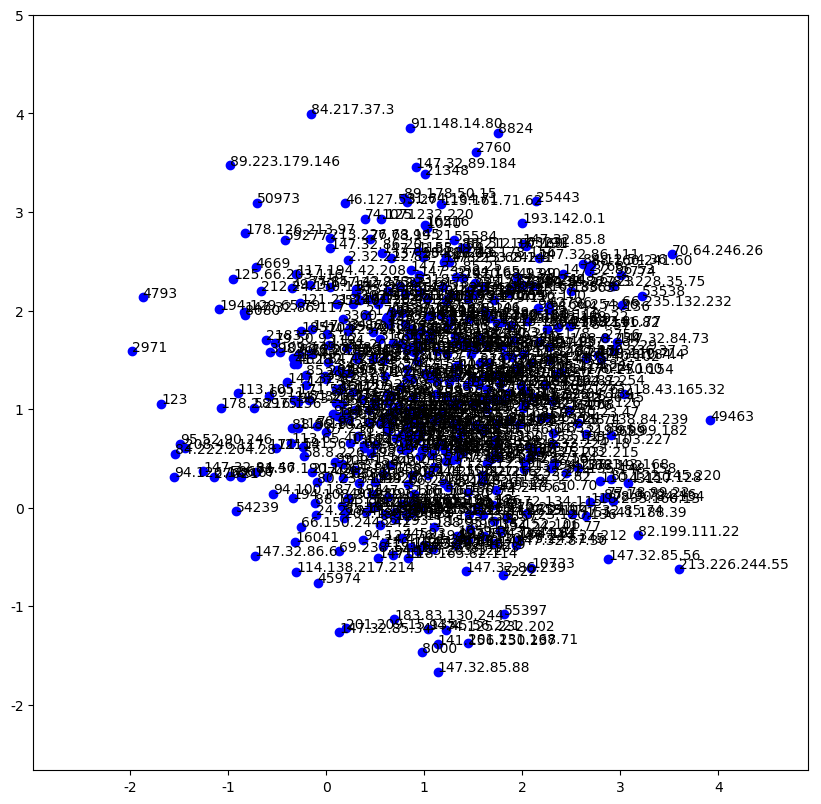

In [54]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Fixing random state for reproducibility






import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.scatter(x1,x2,marker='o',c='blue')
    ax.annotate(word, (x1,x2 ))
    
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = (100)
plt.rcParams['axes.unicode_minus'] = False

plt.show()